In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

In [36]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.dropna(inplace=True)

In [8]:
train_data = df
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

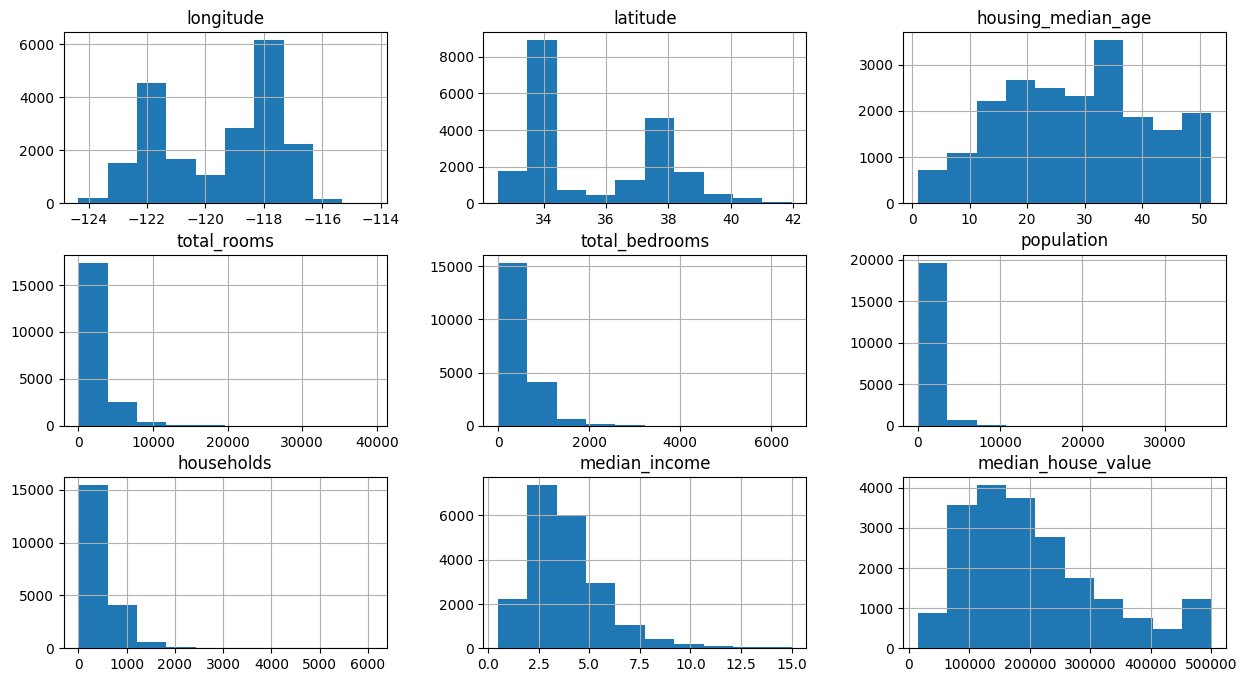

In [9]:
train_data.hist(figsize=(15, 8))

In [10]:
train_data["total_rooms"] = np.log(train_data["total_rooms"]+1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"]+1)
train_data["population"] = np.log(train_data["population"]+1)
train_data["households"] = np.log(train_data["households"]+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

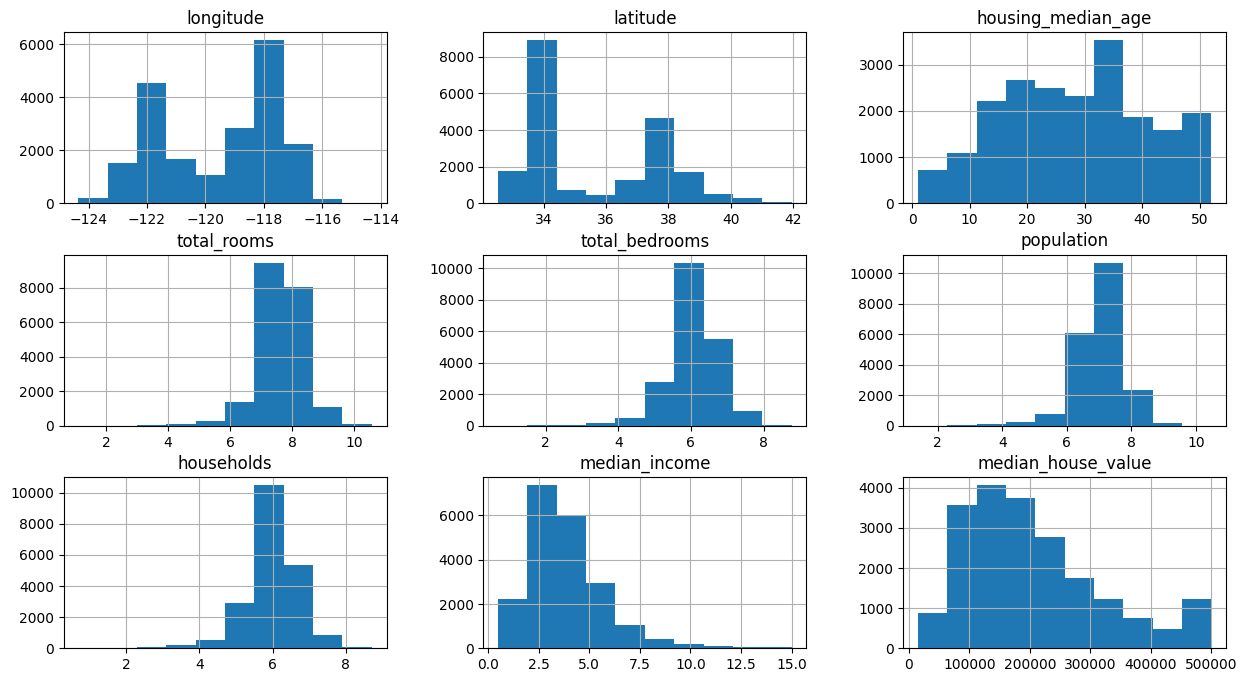

In [11]:
train_data.hist(figsize=(15, 8))

In [12]:
fig = px.scatter_mapbox(train_data, lat='latitude', lon='longitude',
                        hover_name='ocean_proximity',
                        color='median_house_value',
                        size='population',
                        zoom=4, height=600)
fig.update_layout( mapbox_style="open-street-map")
fig.show()

In [13]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)
columns_to_convert = ["<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"]
for column in columns_to_convert:
    train_data[column] = train_data[column].replace({True: 1, False: 0})
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,0,1,0,0,0


In [14]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.029967,0.060817,0.109259,0.055823,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.032552,-0.068248,-0.136543,-0.088207,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.313918,-0.272112,-0.243011,-0.241630,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.029967,-0.032552,-0.313918,1.000000,0.945865,0.864580,0.931700,0.205800,0.158506,0.020809,-0.012862,-0.007567,-0.016499,0.002862
total_bedrooms,0.060817,-0.068248,-0.272112,0.945865,1.000000,0.897523,0.974593,-0.025575,0.053311,0.041725,-0.044914,-0.001902,-0.016793,0.016429
population,0.109259,-0.136543,-0.243011,0.864580,0.897523,1.000000,0.932190,-0.004850,-0.021904,0.115020,-0.071775,-0.012866,-0.059377,-0.014457
households,0.055823,-0.088207,-0.241630,0.931700,0.974593,0.932190,1.000000,0.003918,0.072765,0.072391,-0.087137,-0.009222,-0.005827,0.019715
median_income,-0.015550,-0.079626,-0.118278,0.205800,-0.025575,-0.004850,0.003918,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.158506,0.053311,-0.021904,0.072765,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,0.020809,0.041725,0.115020,0.072391,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


<Axes: >

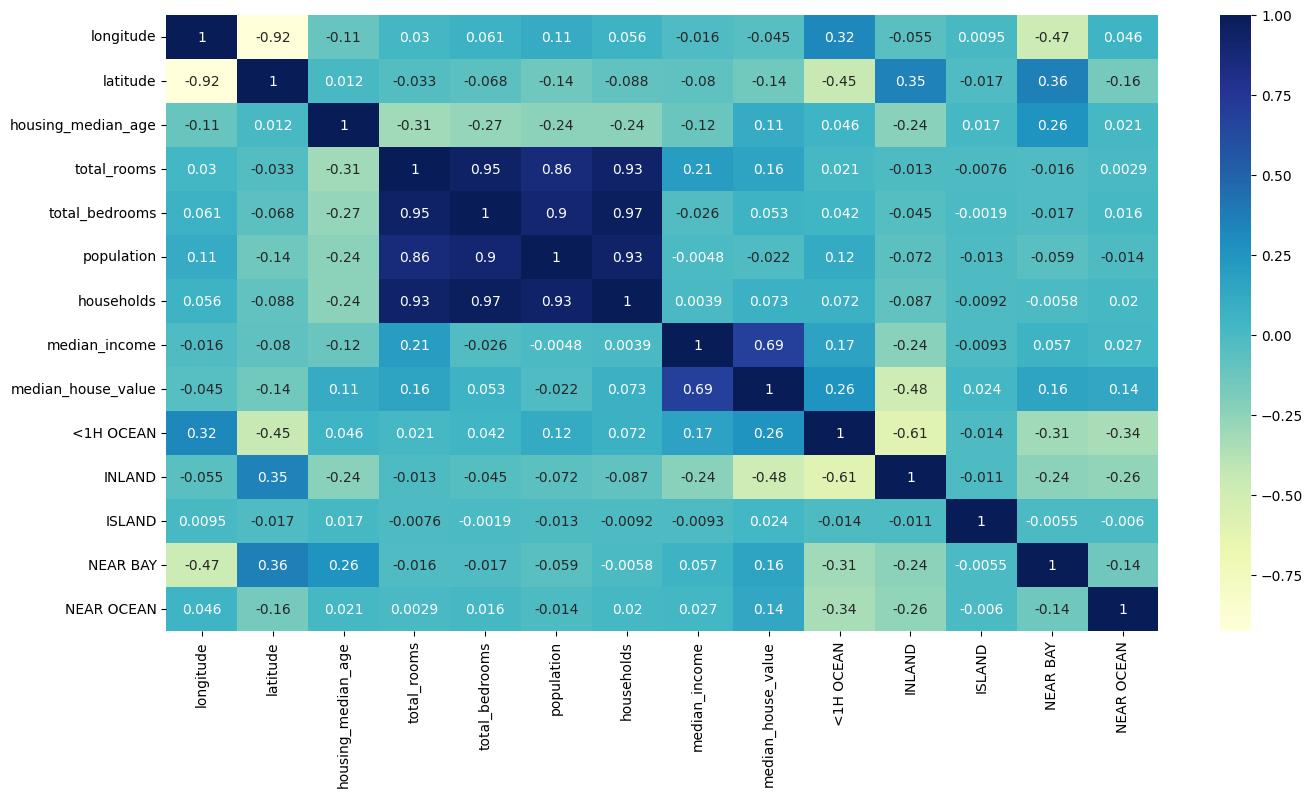

In [15]:
plt.figure(figsize=(16,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [16]:
train_data.drop(["total_bedrooms", "total_rooms"], axis=1, inplace=True)

<Axes: xlabel='latitude', ylabel='longitude'>

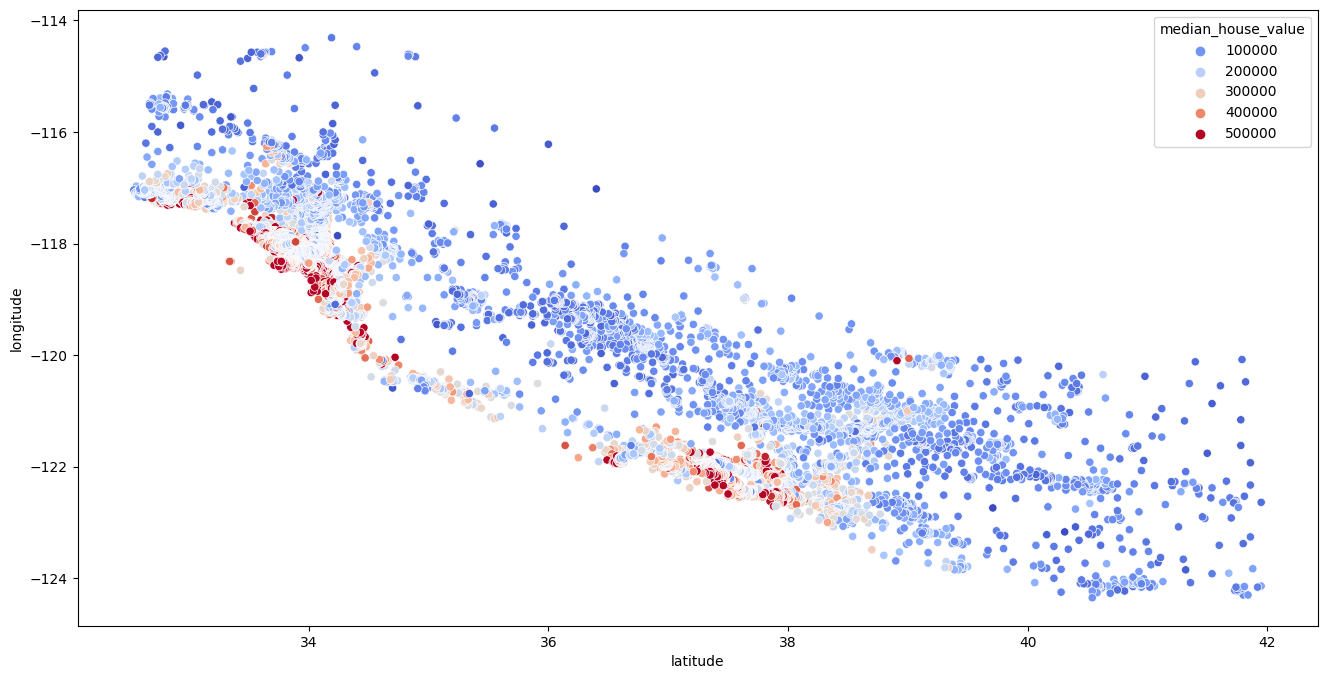

In [17]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [18]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()

scaled_data = train_data.copy()
float_columns = scaled_data.select_dtypes(include=['float64']).columns

scaled_data[float_columns] = MM.fit_transform(scaled_data[float_columns])

In [19]:
num_data = []
for column in scaled_data.columns:
    if scaled_data[column].dtype == float:
        num_data.append(column)
num_data

['longitude',
 'latitude',
 'housing_median_age',
 'population',
 'households',
 'median_income',
 'median_house_value']

longitude                Axes(0.125,0.11;0.0945122x0.77)
latitude              Axes(0.238415,0.11;0.0945122x0.77)
housing_median_age    Axes(0.351829,0.11;0.0945122x0.77)
population            Axes(0.465244,0.11;0.0945122x0.77)
households            Axes(0.578659,0.11;0.0945122x0.77)
median_income         Axes(0.692073,0.11;0.0945122x0.77)
median_house_value    Axes(0.805488,0.11;0.0945122x0.77)
dtype: object

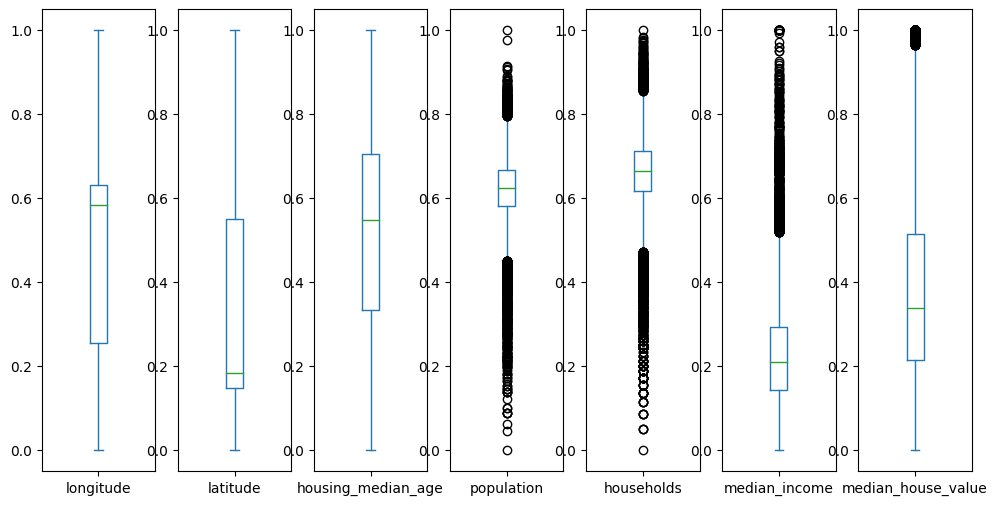

In [20]:
scaled_data[num_data].plot(kind="box", figsize=(12, 6), subplots=True)


In [21]:
from scipy.stats import zscore
Z_score = zscore(scaled_data[num_data])
Z_score

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value
0,-1.327314,1.051717,0.982163,-1.694198,-1.568921,2.345163,2.128819
1,-1.322323,1.042355,-0.606210,1.030718,1.449247,2.332632,1.313626
2,-1.332305,1.037674,1.855769,-1.108938,-1.104448,1.782939,1.258183
3,-1.337296,1.037674,1.855769,-0.949279,-0.812988,0.932970,1.164622
4,-1.337296,1.037674,1.855769,-0.932378,-0.583151,-0.013143,1.172418
...,...,...,...,...,...,...,...
20635,-0.758318,1.800677,-0.288535,-0.386520,-0.250977,-1.216727,-1.115492
20636,-0.818212,1.805358,-0.844466,-1.558274,-1.705478,-0.692044,-1.124155
20637,-0.823203,1.777272,-0.923885,-0.148573,0.121769,-1.143171,-0.992477
20638,-0.873115,1.777272,-0.844466,-0.564663,-0.174186,-1.055136,-1.058316


In [22]:
no_outliers = ((Z_score > -3.0) & (Z_score < 3.0)).all(axis=1)
no_outliers

0        True
1        True
2        True
3        True
4        True
         ... 
20635    True
20636    True
20637    True
20638    True
20639    True
Length: 20433, dtype: bool

In [23]:
clean_data_set=scaled_data[no_outliers]
clean_data_set

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.211155,0.567481,0.784314,0.482772,0.517579,0.539668,0.902266,0,0,0,1,0
1,0.212151,0.565356,0.392157,0.703350,0.791107,0.538027,0.708247,0,0,0,1,0
2,0.210159,0.564293,1.000000,0.530148,0.559673,0.466028,0.695051,0,0,0,1,0
3,0.209163,0.564293,1.000000,0.543072,0.586087,0.354699,0.672783,0,0,0,1,0
4,0.209163,0.564293,1.000000,0.544440,0.606916,0.230776,0.674638,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.588626,0.637020,0.073130,0.130105,0,1,0,0,0
20636,0.312749,0.738576,0.333333,0.493775,0.505203,0.141853,0.128043,0,1,0,0,0
20637,0.311753,0.732200,0.313725,0.607888,0.670801,0.082764,0.159383,0,1,0,0,0
20638,0.301793,0.732200,0.333333,0.574206,0.643980,0.094295,0.143713,0,1,0,0,0


In [24]:
X_train = clean_data_set.drop(["median_house_value"], axis=1)
y_train = clean_data_set["median_house_value"]

In [25]:
from sklearn.model_selection import train_test_split
X_train, x_temp, y_train, y_temp = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
test_pred = model.predict(X_train)
mse = mean_squared_error(y_train, test_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.017821019225799477


In [28]:
model.score(X_train, y_train)

0.6518327324964893

In [29]:
valid_pred = model.predict(x_valid)
mse = mean_squared_error(y_valid, valid_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.018031053776846682


In [30]:
model.score(x_temp, y_temp)

0.6526311389324226

In [31]:
final_pred = model.predict(x_test)
mse = mean_squared_error(y_test, final_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.019157121920168555


In [32]:
model.score(x_test, y_test)

0.640226256522465

In [33]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
y_pred1 = forest_model.predict(x_test)

In [35]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred1)
print("R2 score with random frost:", r2)

R2 score with random frost: 0.8053575371994599
